In [59]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

In [15]:
data = pd.read_csv('diamonds.txt', sep='\t')

In [22]:
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [27]:
predict = data.price

In [28]:
predict.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data, predict, test_size = 0.25, random_state = 123)

In [30]:
print len(x_train), len(x_test)
print len(y_train), len(y_test)

40455 13485
40455 13485


In [43]:
y_train.head()

29663      706
11707      596
52161     2473
6965      4149
26549    16234
Name: price, dtype: int64

In [46]:
linreg = LinearRegression().fit(x_train,y_train)

In [47]:
linreg.score(x_train,y_train)

1.0

In [49]:
linreg.predict(x_test)

array([ 802.,  935., 5826., ..., 1581.,  675., 3439.])

In [51]:
linreg.score(x_test,y_test)

1.0

In [54]:
randomforest = RandomForestRegressor(random_state=1).fit(x_train,y_train)

In [55]:
randomforest.score(x_train,y_train)

0.9999999851537704

In [56]:
randomforest.predict(x_test)

array([ 802. ,  935. , 5825.8, ..., 1581. ,  675. , 3437.8])

In [57]:
randomforest.score(x_test,y_test)

0.9999999446943761

In [60]:
stats.chisquare(randomforest.predict(x_test), linreg.predict(x_test))

Power_divergenceResult(statistic=1.1658395645377562, pvalue=1.0)

In [62]:
stats.ttest_rel(randomforest.predict(x_test), linreg.predict(x_test))

Ttest_relResult(statistic=-10.331807545727823, pvalue=6.267694103891268e-25)

In [63]:
#решение:

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
%pylab inline
import matplotlib.pyplot as plt

data = pd.read_csv('diamonds.txt',sep='\t')
y = data.price.values
X = data.drop(['price'],axis=1).values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=1)

reg_LR = LinearRegression().fit(X_train, y_train)
reg_RF = RandomForestRegressor(random_state=1).fit(X_train, y_train)

delta_LR = np.abs(reg_LR.predict(X_test) - y_test)
delta_RF = np.abs(reg_RF.predict(X_test) - y_test)

stats.ttest_rel(delta_LR,delta_RF)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Ttest_relResult(statistic=12.930817614949715, pvalue=5.074175575599009e-38)

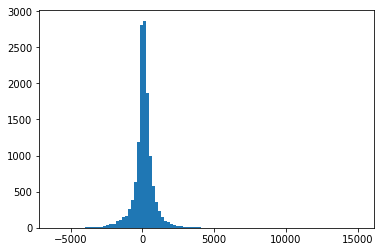

In [65]:
plt.hist(delta_LR-delta_RF,bins=100) # убеждаемся что распределение нормальное (так как Шапиро-Уилка ругается на N>5000)
plt.show()

In [66]:
delta_LR

array([ 214.42235621, 1016.46053685,   41.87871693, ..., 2171.49180326,
        103.82818096,  159.32529706])

In [73]:
raszn = abs(delta_LR-delta_RF)

In [74]:
raszn

array([ 80.12764379, 275.13946315, 460.12128307, ..., 745.49180326,
       194.87181904, 121.77470294])

In [75]:
import statsmodels.stats.api as sms

In [86]:
import scipy
from statsmodels.stats.weightstats import *

In [93]:
DescrStatsW(raszn).tconfint_mean()

(471.9283409873813, 492.79187046154806)

In [97]:
DescrStatsW(abs(delta_LR-delta_RF)).tconfint_mean()

(471.9283409873813, 492.79187046154806)

In [88]:
def mean_confidence_interval(dta, confidence=0.95):
    a = 1.0 * np.array(dta)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [91]:
round(mean_confidence_interval(raszn)[1],1)

471.9

In [96]:
a = 1.0 * np.array(abs(delta_LR-delta_RF))
n = len(a)
m, se = np.mean(a), scipy.stats.sem(a)
h = se * scipy.stats.t.ppf((1 + 0.95) / 2., n-1)
print m, m-h, m+h

482.3601057244647 471.9283409873813 492.79187046154806
